In [18]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (3, 3)

from matscipy.dislocation import get_elastic_constants, plot_vitek

from ase.optimize.precon import PreconLBFGS

# Building cylindrical configurations with dislocations

![](dislocation_cylinder.png)

The `matscipy.dislocation` provides a set of tools to create atomistic configurations containing dislocations. In this example we focus on cylindrical configurations. In order to create a dislocation we start with a cylinder of bulk material oriented along the vector of the future dislocation line $\vec l$. By convention assumed in `matscipy.dislocation` Z direction of the cell always corresponds to the dislocation line $\vec l$. Then a displacement field is applied to the cylinder and outer radial shell is fixed in order to stabilise the configuration. So we end up with periodic boundary conditions along the dislocation line (Z) and fixed boundaries along X and Y directions. As shown on the figure above, screw dislocations are characterised by a displacement with corresponding burgers vector $\vec b$ parallel to the dislocation line $\vec l$, while edge dislocations have the burgers vector $\vec b$ perpendicular to $\vec l$. `matscipy` uses an anisotropic solution within [Stroh formalism](https://doi.org/10.1080/14786435808565804) to generate displacement field as implemented in [atomman](https://www.ctcms.nist.gov/potentials/atomman/) package.

For the interactive visualisation of the structures we will use [nglview](https://nglviewer.org/nglview/latest/) which allows viewing atomistic structures interactively within an IPython/Jupyter notebooks. We will also color atoms according to the crystallographic structure identified by [Common Neighbour Analysis algoritm](https://www.ovito.org/docs/current/reference/pipelines/modifiers/common_neighbor_analysis.html) and its [extention for diamond structure](https://www.ovito.org/docs/current/reference/pipelines/modifiers/identify_diamond.html) implemented in [OVITO](https://www.ovito.org/docs/current/introduction.html) package. [OVITO](https://www.ovito.org/docs/current/introduction.html), [atomman](https://www.ctcms.nist.gov/potentials/atomman/) and [nglview](https://nglviewer.org/nglview/latest/) are not part of the default dependencies of `matscipy` and require separate installation. Keep that in mind while running these examples as well test in [`test_dislocation.py`](https://github.com/libAtoms/matscipy/blob/master/tests/test_dislocation.py) since the majority of the tests there require this modules and thus will be skipped if the modules are not found in your system. Please note that for this example we use very small systems (small radius). For production calculations one should do a convergence tests with the system size in order to ensure that fixed boundaries do not affect the studied properties.

In [1]:
import numpy as np
import nglview # this import is necessary for rendering of the 3D view
from visualisation import show_dislocation, interactive_view

## Accessing Key Dislocation Properties
As defined in a dimensionless (alat=1) frame, each kind of dislocation has several key properties which describe the geometric layout of the atomic cell, and also the position and orientation of the dislocation. Such properties are stored in matscipy as attributes of each dislocation class, such that they can be accessed without actually needing to construct a dislocation.

As an example:

In [49]:
from matscipy.dislocation import BCCMixed111Dislocation

print("For a BCC 1/2<111>{110} Mixed Dislocation")
print()

print("The dislocation is oriented in a cell described by the miller indeces: ")
print(BCCMixed111Dislocation.axes)

print("Dimensionless burgers vector is: ", BCCMixed111Dislocation.burgers_dimensionless)

print("Dislocation core will be at fractional coords ", BCCMixed111Dislocation.unit_cell_core_position_dimensionless, " within a unit cell")

For a BCC 1/2<111>{110} Mixed Dislocation

The dislocation is oriented in a cell described by the miller indeces: 
[[ 1 -1 -2]
 [ 1  1  0]
 [ 1 -1  1]]
Dimensionless burgers vector is:  [ 0.5 -0.5 -0.5]
Dislocation core will be at fractional coords  [0.16666667 0.16666667 0.        ]  within a unit cell


## Available Dislocation Systems
The available dislocation systems are:

In [17]:
import matscipy.dislocation as disloc_mod
import inspect
# Find all classes in matscipy.dislocation which inherit from the Abstact Base Class CubicCrystalDislocation
for name, attr in disloc_mod.__dict__.items():
    if inspect.isclass(attr):
        if issubclass(attr, disloc_mod.CubicCrystalDislocation) and attr not in [disloc_mod.CubicCrystalDislocation, disloc_mod.CubicCrystalDissociatedDislocation]:
            print(name)

BCCScrew111Dislocation
BCCEdge111Dislocation
BCCMixed111Dislocation
BCCEdge100Dislocation
BCCEdge100110Dislocation
DiamondGlide30degreePartial
DiamondGlide90degreePartial
DiamondGlideScrew
DiamondGlide60Degree
FCCScrewShockleyPartial
FCCEdgeShockleyPartial
FCCScrew110Dislocation
FCCEdge110Dislocation


## Accessing Key Dislocation Properties
As defined in a dimensionless (alat=1) frame, each kind of dislocation has several key properties which describe the geometric layout of the atomic cell, and also the position and orientation of the dislocation. Such properties are stored in matscipy as attributes of each dislocation class, such that they can be accessed without actually needing to construct a dislocation.

As an example:

In [20]:
 from matscipy.dislocation import BCCMixed111Dislocation
print("For a BCC 1/2<111>{110} Mixed Dislocation")
print()
print("The dislocation is oriented in a cell described by the miller indeces: ")
print(BCCMixed111Dislocation.axes)
print("Dimensionless burgers vector is: ", BCCMixed111Dislocation.burgers_dimensionless)
print("Dislocation core will be at fractional coords ", BCCMixed111Dislocation.unit_cell_core_position_dimensionless, " within a unit cell")

For a BCC 1/2<111>{110} Mixed Dislocation

The dislocation is oriented in a cell described by the miller indeces: 
[[ 1 -1 -2]
 [ 1  1  0]
 [ 1 -1  1]]
Dimensionless burgers vector is:  [ 0.5 -0.5 -0.5]
Dislocation core will be at fractional coords  [0.16666667 0.16666667 0.        ]  within a unit cell


## Available Dislocation Systems

The available dislocation systems are:

In [ ]:
import matscipy.dislocation as disloc_mod
import inspect
# Find all classes in matscipy.dislocation which inherit from the Abstact Base Class CubicCrystalDislocation
for name, attr in disloc_mod.__dict__.items():
    if inspect.isclass(attr):
        if issubclass(attr, disloc_mod.CubicCrystalDislocation) and attr not in [disloc_mod.CubicCrystalDislocation, disloc_mod.CubicCrystalDissociatedDislocation]:
            print(name)

## Body Centered Cubic 

For the case of BCC structure we take tungsten as an example. In order to create a dislocation configuration one has to provide lattice parameter and elastic constants. It is possible to provide these values from literature. However, if you plan to relax the configuration with an interatomic potential, `matscipy.dislocation` provides a convenient method `get_elastic_constants` to calculate desired properties. We will use and Embedded Atom Potential from [Marinica _et. al._ 2013 paper](http://dx.doi.org/10.1088/0953-8984/25/39/395502) (version EAM4) for the case of tungsten.

In [2]:
from matscipy.dislocation import get_elastic_constants
# the calculator to provide forces and energies from the potential
from matscipy.calculators.eam import EAM
eam_calc = EAM("../../tests/w_eam4.fs")

# the function accepts any ASE type of calculator
alat, C11, C12, C44 = get_elastic_constants(calculator=eam_calc, symbol="W")

      Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
FIRE:    0 17:12:31      -17.792788*       1.5616
FIRE:    1 17:12:31      -17.796007*       1.2330
FIRE:    2 17:12:31      -17.798904*       0.6354
FIRE:    3 17:12:31      -17.799853*       0.2223
FIRE:    4 17:12:31      -17.799882*       0.1976
FIRE:    5 17:12:31      -17.799928*       0.1509
FIRE:    6 17:12:31      -17.799970*       0.0870
FIRE:    7 17:12:31      -17.799991*       0.0130
FIRE:    8 17:12:31      -17.799981*       0.0629
FIRE:    9 17:12:31      -17.799981*       0.0611
FIRE:   10 17:12:31      -17.799982*       0.0576
FIRE:   11 17:12:31      -17.799984*       0.0525
FIRE:   12 17:12:31      -17.799986*       0.0458
FIRE:   13 17:12:31      -17.799988*       0.0379
FIRE:   14 17:12:31      -17.799989*       0.0289
FIRE:   15 17:12:31      -17.799991*       0.0191
FIRE:   16 17:12:31      -17.799991*       0.0076
FIRE:   17 17:12:31      -17.799992*       0.0052
FI

In [3]:
print(f"{alat:.3f} (Angstrom), {C11:.2f}, {C12:.2f}, {C44:.2f} (GPa)")

3.143 (Angstrom), 538.90, 219.93, 178.80 (GPa)


The values are in good agreement with corresponding numbers in the paper: 3.143, 523, 202, 161

### 1/2<111>{110} screw dislocation

The notation 1/2<111>{110} means a dislocation with a burgers vector 1/2<111> and glide plane {110}. For screw dislocation, the dislocation line is parallel to the burgers vector, thus Z direction of the cell will be along <111>. The glide plane {110} fixes the Y direction to be <110> and the X direction is fixed by the geometry to be along <112>. However you do not have to think about it to start since `BCCScrew111Dislocation` object contains all the necessary information. All you need to do is to pass $a_0$ and elastic constants $C_{11}$, $C_{12}$ and $C_{44}$ and the symbol of the desired BCC element to the constructor.

In [4]:
from matscipy.dislocation import BCCScrew111Dislocation

W_screw = BCCScrew111Dislocation(alat, C11, C12, C44, symbol="W")

print("Cell orientation:")
print(W_screw.axes)

print("Burgers vector:")
print(W_screw.burgers)


Cell orientation:
[[ 1  1 -2]
 [-1  1  0]
 [ 1  1  1]]
Burgers vector:
[1.57169453 1.57169453 1.57169453]


We are going to use `BCCScrew111Dislocation.build_cylinder()` method to build the cells. All the necessary parameters are passed automatically and we only need to chose the radius of the cell in (X,Y) plane. The function returns reference bulk cell and a cell containing dislocation. The displacement field is applied iteratively until a converged value is achieved, the printed output shows the difference between the steps. The radius provided is a parameter is a radius of unconstrained region around the core. The outer shell of fixed atoms is added on top of this. The default value is 10 Angstrom which is about two times larger than the cutoff for the used interatomic potential. The information about which atoms are fixed is stored in `fix_mask` array and can be accessed via `W_screw_dislo.get_array('fix_mask')`.

In [5]:
W_screw_bulk, W_screw_dislo = W_screw.build_cylinder(radius=20)

print("\nCell vectors:")
print(W_screw_dislo.cell.array)

print(f"\nBurgers vector lenth: {np.linalg.norm(W_screw.burgers):.2f} Angstrom")

disloc SCF 0 |d1-d2|_inf = 0.0014007233320793289
disloc SCF 1 |d1-d2|_inf = 6.7043949893985655e-06
disloc SCF 2 |d1-d2|_inf = 3.208936316667632e-08

Cell vectors:
[[61.59759392  0.          0.        ]
 [ 0.         62.235928    0.        ]
 [ 0.          0.          2.72225477]]

Burgers vector lenth:
2.722254772666657


Now we can look at the created structure with the interactive view. Hovering your mouse over an atom will show chemical symbol of the atom and the structure identified by CNA algorithm. Dislocation is shown with an arrow corresponding to the dislocation line vector $\vec l$. Hovering over the dislocation will display the dislocation name. Moreover, you can use your mouse to control the view:

- Translation: right click + drag
- Rotation: left click + drag
- Z-axis rotation: Ctrl + right click + drag
- Zoom: scroll wheel
- Center view: left click on the desired atom

In [32]:
show_dislocation(W_screw_dislo, d_name="1/2<111> screw")

NGLWidget()

It can be seen that most of the cell is identified as BCC structure with some grey atoms identified as _Other_. These atoms represent the defect atoms, where the algorithm could not assign a crystallographic structure. In this case we have defect atoms at the dislocation core and on the artificial free surfaces on the edges of the cell. The atoms at the _surface_ are part of fixed region of the cell. 

Here we have a cell with the length of one Burgers vector $|\vec b| = \frac{\sqrt{3}}{2}a_0$ along the dislocation line. With the periodic boundary conditions along Z, it corresponds to infinitely long straight dislocation line. Note that the periodic boundary conditions along the dislocation line are not applied in the visualisation. It makes it easier to see the displacement, but you might notice the atoms outside the simulation box. 

To increase the size of the cell along the line we can rely on the magic of [ASE](https://wiki.fysik.dtu.dk/ase/) and simply multiply the cell.

In [6]:
interactive_view(W_screw_dislo * [1, 1, 10])

NGLWidget()

Since fo screw dislocations the displacement is parallel to the dislocation line, it is not easy to see the displacement without 3D tools. Thus so-called differential displacement (Vitek) maps are used to visualise the dislocation core. `matscipy.dislocation` offers a tool called {py:meth}`matscipy.dislocation.plot_vitek` to build these maps. The colors of the atoms represent three non equivalen planes of W atoms along <111> direction and the arrows represent the difference in displacement of atoms along Z direction. The visualisation below shows so-called compact and symmetric core, which is the most stable for BCC materials. 

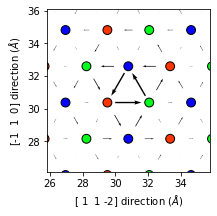

In [7]:
fig, ax = plt.subplots()
plot_vitek(W_screw_dislo, W_screw_bulk, alat=alat, xyscale=5, plot_axes=ax)
ax.set_aspect("equal")
ax.set_xlabel(f"{W_screw.axes[0]} direction ($\AA$)")
ax.set_ylabel(f"{W_screw.axes[1]} direction ($\AA$)");

We can use the ASE minimisation tools to minimise the structure using the chosen interatomic potential:

In [8]:
W_screw_dislo.calc = eam_calc
opt = PreconLBFGS(W_screw_dislo)
opt.run(fmax=0.01)


PreconLBFGS:   0  17:12:34    -1936.097946       2.5284
PreconLBFGS:   1  17:12:35    -1936.291357       0.3596
PreconLBFGS:   2  17:12:35    -1936.346476       0.2286
PreconLBFGS:   3  17:12:36    -1936.361691       0.6206
PreconLBFGS:   4  17:12:36    -1936.374519       0.1534
PreconLBFGS:   5  17:12:36    -1936.377157       0.0604
PreconLBFGS:   6  17:12:37    -1936.378302       0.0847
PreconLBFGS:   7  17:12:38    -1936.378545       0.0449
PreconLBFGS:   8  17:12:38    -1936.378652       0.0124
PreconLBFGS:   9  17:12:38    -1936.378665       0.0059


True

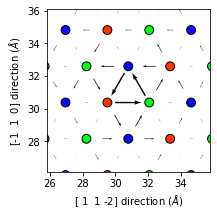

In [9]:
fig, ax = plt.subplots()
plot_vitek(W_screw_dislo, W_screw_bulk, alat=alat, xyscale=5, plot_axes=ax)
ax.set_aspect("equal")
ax.set_xlabel(f"{W_screw.axes[0]} direction ($\AA$)")
ax.set_ylabel(f"{W_screw.axes[1]} direction ($\AA$)");

Differential displacement map of the relaxed structure shows almost the same picture as before with symmetric 'easy' dislocation core. This means that for the selected interatomic potential this structure is indeed the most stable and that the initial guess of the displacement was reasonably good. 

If you want to save the configuration in a file for further analysis or as an input for a code you can use build in [ASE write method](https://wiki.fysik.dtu.dk/ase/ase/io/io.html#ase.io.write) as `longer_W_screw_dislo.write(filename)`. The method supports a wide range of formats including `xyz` and LAMMPS data files. Do not forget to take into account fixed atoms if you use the saved file as an input for a simulation code like LAMMPS. 

### 1/2<111>{110} edge dislocation

As we said before, for edge dislocations burgers vectpr $\vec b$ is perpendicular to the dislocation $\vec l$. So here, we have the same glide plane of (110) which fixes the cell Y direction to <110>. X direction now will be along burgers vector <111> and Z dislocation line direction <112>.

In [10]:
from matscipy.dislocation import BCCEdge111Dislocation

W_edge = BCCEdge111Dislocation(alat, C11, C12, C44, symbol="W")

print("Cell orientation:")
print(W_edge.axes)

print("Burgers vector:")
print(W_edge.burgers)


Cell orientation:
[[ 1  1  1]
 [ 1 -1  0]
 [ 1  1 -2]]
Burgers vector:
[1.57169453 1.57169453 1.57169453]


In [11]:
W_edge_bulk, W_edge_dislo = W_edge.build_cylinder(radius=15)

print("\nCell vectors:")
print(W_edge_dislo.cell.array)

print(f"\nBurgers vector lenth: {np.linalg.norm(W_edge.burgers):.2f} Angstrom")

disloc SCF 0 |d1-d2|_inf = 0.17503717189385914
disloc SCF 1 |d1-d2|_inf = 0.03066965106335537
disloc SCF 2 |d1-d2|_inf = 0.0043764896402691544
disloc SCF 3 |d1-d2|_inf = 0.0008807112000274175
disloc SCF 4 |d1-d2|_inf = 0.00015452837692359056
disloc SCF 5 |d1-d2|_inf = 2.6112647029563618e-05
disloc SCF 6 |d1-d2|_inf = 5.748780400494091e-06
disloc SCF 7 |d1-d2|_inf = 7.771108775367352e-07

Cell vectors:
[[54.44509545  0.          0.        ]
 [ 0.         53.34508114  0.        ]
 [ 0.          0.          7.69969924]]

Burgers vector lenth:
2.722254772666657


NGLWidget()

It can be seen from the print output of ` W_edge.build_cylinder()` that the case of edge dislocation the requires more iterations to achieve converged displacement field.

In [12]:
W_edge_dislo.calc = eam_calc
opt = PreconLBFGS(W_edge_dislo)
opt.run(fmax=0.01)

PreconLBFGS:   0  17:12:40    -3017.104472       5.8264
PreconLBFGS:   1  17:12:42    -3017.709557       4.8423
PreconLBFGS:   2  17:12:43    -3018.145952       3.6773
PreconLBFGS:   3  17:12:43    -3018.510026       2.2950
PreconLBFGS:   4  17:12:44    -3018.881181       1.4546
PreconLBFGS:   5  17:12:45    -3019.132006       0.7013
PreconLBFGS:   6  17:12:45    -3019.257226       0.4936
PreconLBFGS:   7  17:12:46    -3019.309721       0.8501
PreconLBFGS:   8  17:12:47    -3019.331783       0.4275
PreconLBFGS:   9  17:12:48    -3019.340055       0.2540
PreconLBFGS:  10  17:12:50    -3019.343848       0.2224
PreconLBFGS:  11  17:12:50    -3019.345682       0.3022
PreconLBFGS:  12  17:12:51    -3019.347748       0.1698
PreconLBFGS:  13  17:12:51    -3019.348742       0.0915
PreconLBFGS:  14  17:12:53    -3019.349178       0.0348
PreconLBFGS:  15  17:12:53    -3019.349290       0.0489
PreconLBFGS:  16  17:12:54    -3019.349394       0.0276
PreconLBFGS:  17  17:12:55    -3019.349421      

True

In [13]:
show_dislocation(W_edge_dislo, scale=0.25, d_name="1/2<111> edge")

NGLWidget()

### 1/2<111>{110} mixed dislocation

For mixed dislocation the cell vector are the same as for the screw dislocation. The difference is that the displacement vector is applied along <111> direction that is not parallel to the Z direction: [$1\bar 11$] and [$1\bar 1 \bar1$] with an angle of 70.5 degrees between the vectors. This leads to both edge and screw component in the displacement and thus the name _mixed_ dislocation.

In [14]:
from matscipy.dislocation import BCCMixed111Dislocation

W_mixed = BCCMixed111Dislocation(alat, C11, C12, C44, symbol="W")

print("Cell orientation:")
print(W_mixed.axes)

print("Burgers vector:")
print(W_mixed.burgers)


Cell orientation:
[[ 1 -1 -2]
 [ 1  1  0]
 [ 1 -1  1]]
Burgers vector:
[ 1.57169453 -1.57169453 -1.57169453]


In [15]:
W_mixed_bulk, W_mixed_dislo = W_mixed.build_cylinder(radius=20)

print("\nCell vectors:")
print(W_mixed_dislo.cell.array)

print(f"\nBurgers vector length: {np.linalg.norm(W_mixed.burgers):.2f} Angstrom")

interactive_view(W_mixed_dislo, scale=0.5)

disloc SCF 0 |d1-d2|_inf = 0.29120782506159093
disloc SCF 1 |d1-d2|_inf = 0.04617006234943166
disloc SCF 2 |d1-d2|_inf = 0.011433815820402815
disloc SCF 3 |d1-d2|_inf = 0.0007697516027555945
disloc SCF 4 |d1-d2|_inf = 0.0003591872411294883
disloc SCF 5 |d1-d2|_inf = 2.8555001409594216e-05
disloc SCF 6 |d1-d2|_inf = 1.0262833599394838e-05
disloc SCF 7 |d1-d2|_inf = 9.26250876873147e-07

Cell vectors:
[[61.59759392  0.          0.        ]
 [ 0.         62.235928    0.        ]
 [ 0.          0.          2.72225477]]

Burgers vector lenth:
2.722254772666657


NGLWidget()

Text(0, 0.5, '[1 1 0] direction ($\\AA$)')

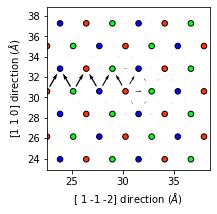

In [16]:
fig, ax = plt.subplots()
plot_vitek(W_mixed_dislo, W_mixed_bulk, alat=alat, xyscale=8, plot_axes=ax)
ax.set_aspect("equal")
ax.set_xlabel(f"{W_mixed.axes[0]} direction ($\AA$)")
ax.set_ylabel(f"{W_mixed.axes[1]} direction ($\AA$)")

It can be seen that the screw displacement component is not local as compared to the case of screw dislocation. This is because in this visualisation edge component of the displacement is not taken into account. It is the full displacement as screw plus edge component that makes a periodic vector leading to perfect structure and thus no displacement far from the dislocation core.

In [17]:
W_mixed_dislo.calc = eam_calc
opt = PreconLBFGS(W_mixed_dislo)
opt.run(fmax=0.01)

PreconLBFGS:   0  17:12:58    -1345.291374       2.0670
PreconLBFGS:   1  17:12:58    -1345.511354       1.2264
PreconLBFGS:   2  17:12:59    -1345.668167       1.2348
PreconLBFGS:   3  17:12:59    -1345.845825       0.9316
PreconLBFGS:   4  17:12:59    -1345.927850       0.6732
PreconLBFGS:   5  17:12:59    -1345.992997       0.6671
PreconLBFGS:   6  17:13:00    -1346.034419       0.8608
PreconLBFGS:   7  17:13:00    -1346.078630       0.5041
PreconLBFGS:   8  17:13:00    -1346.101435       0.8506
PreconLBFGS:   9  17:13:00    -1346.110288       0.5020
PreconLBFGS:  10  17:13:01    -1346.116416       0.1456
PreconLBFGS:  11  17:13:01    -1346.117992       0.1432
PreconLBFGS:  12  17:13:01    -1346.119336       0.1049
PreconLBFGS:  13  17:13:01    -1346.119740       0.0290
PreconLBFGS:  14  17:13:02    -1346.119910       0.0260
PreconLBFGS:  15  17:13:02    -1346.119985       0.0260
PreconLBFGS:  16  17:13:02    -1346.120012       0.0122
PreconLBFGS:  17  17:13:03    -1346.120023      

True

In [18]:
interactive_view(W_mixed_dislo, scale=0.5)

NGLWidget()

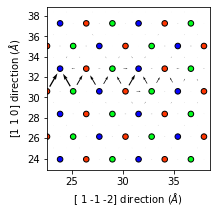

In [19]:
fig, ax = plt.subplots()
plot_vitek(W_mixed_dislo, W_mixed_bulk, alat=alat, xyscale=8, plot_axes=ax)
ax.set_aspect("equal")
ax.set_xlabel(f"{W_mixed.axes[0]} direction ($\AA$)")
ax.set_ylabel(f"{W_mixed.axes[1]} direction ($\AA$)");

Spreading of the dislocation core along the glide plane can be seen in the displacement map after relaxation.

### <100>{110} edge 'junction' dislocation

So called junction dislocations with burdgers vector along <100> can be formed in the reactions between more abundant dislocations with burgers vector 1/2<111> such as: 

$$
    \frac{1}{2}[1\bar{1}1] + \frac{1}{2}[11\bar{1}] = [100]
$$

They share the same glide plane as 1/2<111> dislocations and can play important role in impurity segregation. 

In [20]:
from matscipy.dislocation import BCCEdge100110Dislocation

W_100110_edge = BCCEdge100110Dislocation(alat, C11, C12, C44, symbol="W")

print("Cell orientation:")
print(W_100110_edge.axes)

print("Burgers vector:")
print(W_100110_edge.burgers)


Cell orientation:
[[ 1  0  0]
 [ 0  1  1]
 [ 0 -1  1]]
Burgers vector:
[3.14338905 0.         0.        ]


In [21]:
W_edge_bulk, W_edge_dislo = W_edge.build_cylinder(radius=15)
interactive_view(W_edge_dislo, scale=0.3)

disloc SCF 0 |d1-d2|_inf = 0.38106119508836045
disloc SCF 1 |d1-d2|_inf = 0.08758996175661493
disloc SCF 2 |d1-d2|_inf = 0.016681680943138266
disloc SCF 3 |d1-d2|_inf = 0.0030061600783656828
disloc SCF 4 |d1-d2|_inf = 0.0022649654222646753
disloc SCF 5 |d1-d2|_inf = 0.0003865990814259229
disloc SCF 6 |d1-d2|_inf = 0.00038864015074802083
disloc SCF 7 |d1-d2|_inf = 7.699961515818254e-05
disloc SCF 8 |d1-d2|_inf = 6.11796088796912e-05
disloc SCF 9 |d1-d2|_inf = 1.3713226368575193e-05
disloc SCF 10 |d1-d2|_inf = 8.793773856208276e-06
disloc SCF 11 |d1-d2|_inf = 2.447947355543878e-06
disloc SCF 12 |d1-d2|_inf = 1.127185940752451e-06
disloc SCF 13 |d1-d2|_inf = 5.245602844317077e-07


NGLWidget()

In [22]:
W_edge_dislo.calc = eam_calc
opt = PreconLBFGS(W_edge_dislo)
opt.run(fmax=0.01)

PreconLBFGS:   0  17:13:05    -1690.054252       3.4168
PreconLBFGS:   1  17:13:06    -1690.715614       2.2979
PreconLBFGS:   2  17:13:06    -1691.029877       1.6814
PreconLBFGS:   3  17:13:06    -1691.204064       1.1926
PreconLBFGS:   4  17:13:07    -1691.304510       0.6054
PreconLBFGS:   5  17:13:07    -1691.349364       0.6847
PreconLBFGS:   6  17:13:08    -1691.367045       0.3587
PreconLBFGS:   7  17:13:09    -1691.375287       0.3406
PreconLBFGS:   8  17:13:09    -1691.379171       0.2393
PreconLBFGS:   9  17:13:10    -1691.381406       0.1023
PreconLBFGS:  10  17:13:11    -1691.382284       0.0507
PreconLBFGS:  11  17:13:11    -1691.382462       0.0403
PreconLBFGS:  12  17:13:12    -1691.382549       0.0295
PreconLBFGS:  13  17:13:13    -1691.382577       0.0173
PreconLBFGS:  14  17:13:13    -1691.382595       0.0098


True

In [23]:
interactive_view(W_edge_dislo, scale=0.3)

NGLWidget()

### <100>{001} edge dislocation

This is the same junction dislocation but lying in a different glide plane: (001).

In [24]:
from matscipy.dislocation import BCCEdge100Dislocation

W_100_edge = BCCEdge100Dislocation(alat, C11, C12, C44, symbol="W")

print("Cell orientation:")
print(W_100_edge.axes)

print("Burgers vector:")
print(W_100_edge.burgers)


Cell orientation:
[[ 1  0  0]
 [ 0  0 -1]
 [ 0  1  0]]
Burgers vector:
[3.14338905 0.         0.        ]


In [25]:
W_100_edge_bulk, W_100_edge_dislo = W_100_edge.build_cylinder(radius=20)
show_dislocation(W_100_edge_dislo, scale=0.4, d_name="<100>{001} edge", d_color=[1, 0, 1])

disloc SCF 0 |d1-d2|_inf = 0.29723896079013645
disloc SCF 1 |d1-d2|_inf = 0.03893895819759985
disloc SCF 2 |d1-d2|_inf = 0.011189961805871507
disloc SCF 3 |d1-d2|_inf = 0.001492901691747886
disloc SCF 4 |d1-d2|_inf = 0.00046542738716470744
disloc SCF 5 |d1-d2|_inf = 8.162136711201834e-05
disloc SCF 6 |d1-d2|_inf = 1.3593036749304233e-05
disloc SCF 7 |d1-d2|_inf = 4.370960949406921e-06
disloc SCF 8 |d1-d2|_inf = 5.007713461402385e-07


NGLWidget()

## Face Centered Cubic

As an example of FCC material we will consider Ni and an interatomic potential from [Bonny _et. al._](https://www.tandfonline.com/doi/abs/10.1080/14786430903299824)


In [26]:
eam_calc = EAM("../../tests/FeCuNi.eam.alloy")

# the function accepts any ASE type of calculator
alat, C11, C12, C44 = get_elastic_constants(calculator=eam_calc, symbol="Ni")

PreconLBFGS:   0  17:13:14    -1197.049103       4.0121
PreconLBFGS:   1  17:13:15    -1197.620334       2.9053
PreconLBFGS:   2  17:13:15    -1198.067968       2.6048
PreconLBFGS:   3  17:13:15    -1198.399443       2.4440
PreconLBFGS:   4  17:13:16    -1198.586938       1.1263
PreconLBFGS:   5  17:13:16    -1198.671181       1.3039
PreconLBFGS:   6  17:13:16    -1198.697992       0.7714
PreconLBFGS:   7  17:13:17    -1198.716525       0.2102
PreconLBFGS:   8  17:13:17    -1198.718535       0.1449
PreconLBFGS:   9  17:13:18    -1198.719674       0.1189
PreconLBFGS:  10  17:13:18    -1198.720390       0.0850
PreconLBFGS:  11  17:13:19    -1198.720748       0.0766
PreconLBFGS:  12  17:13:19    -1198.720895       0.0402
PreconLBFGS:  13  17:13:19    -1198.720957       0.0269
PreconLBFGS:  14  17:13:20    -1198.721003       0.0333
PreconLBFGS:  15  17:13:20    -1198.721029       0.0175
PreconLBFGS:  16  17:13:21    -1198.721042       0.0121
PreconLBFGS:  17  17:13:21    -1198.721047      

True

In [27]:
print(f"{alat:.3f} (Angstrom), {C11:.2f}, {C12:.2f}, {C44:.2f} (GPa)")

3.520 (Angstrom), 244.07, 148.85, 125.62 (GPa)


### 1/2<110>{111} screw dislocation (perfect and dissociated)

In [17]:
from matscipy.dislocation import FCCScrew110Dislocation

Ni_screw = FCCScrew110Dislocation(alat, C11, C12, C44, symbol="Ni")

print("Cell orientation:")
print(Ni_screw.axes)

print("Burgers vector:")
print(Ni_screw.burgers)


Cell orientation:
[[ 1  1 -2]
 [ 1  1  1]
 [ 1 -1  0]]
Burgers vector:
[ 1.76 -1.76  0.  ]


In [18]:
Ni_screw_bulk, Ni_screw_dislo = Ni_screw.build_cylinder(radius=20)


print("\nCell vectors:")
print(Ni_screw_dislo.cell.array)

print(f"\nBurgers vector length: {np.linalg.norm(Ni_screw.burgers):.2f} Angstrom")

show_dislocation(Ni_screw_dislo, 
                 d_name="1/2<110> screw dislocation line", 
                 d_color=[0, 0, 1])

disloc SCF 0 |d1-d2|_inf = 0.021791458261984697
disloc SCF 1 |d1-d2|_inf = 0.0002936041882874109
disloc SCF 2 |d1-d2|_inf = 4.8928735380371347e-05
disloc SCF 3 |d1-d2|_inf = 1.2696678054050815e-06
disloc SCF 4 |d1-d2|_inf = 1.0764587210498888e-07
disloc SCF 0 |d1-d2|_inf = 0.020321133865591423
disloc SCF 1 |d1-d2|_inf = 0.0006134137472214689
disloc SCF 2 |d1-d2|_inf = 5.9406489367308524e-05
disloc SCF 3 |d1-d2|_inf = 2.948341477265748e-06
disloc SCF 4 |d1-d2|_inf = 8.340714410803862e-08

Cell vectors:
[[60.35542726  0.          0.        ]
 [ 0.         60.96818843  0.        ]
 [ 0.          0.          2.48901587]]

Burgers vector length: 2.49 Angstrom


NGLWidget()

Due to stable Intrinsic Stacking Fault (ISF) the 1/2<110> dislocations are not stable and dissociate in two 1/6<112> Shockley partials separated by stacking fault. For example:

$$
    \frac{1}{2}[1\bar10] \rightarrow \frac{1}{6}[2\bar1\bar1] + \mathrm{ISF} + \frac{1}{2}[1\bar21]
$$

where ISF is intrinsic stacking fault. It is possible to pass a parameter `partial_distance` to `build_cylinder()` function in order to create dissociated dislocation. `partial distance` defines separation distance (length of the stacking fault) of two partial dislocations. The value corresponds to number of glide distances the distance in Angstrom be obtaines as `patial_distance * dislocation.glide_distance`.

In [35]:
Ni_screw_bulk, Ni_screw_dislo = Ni_screw.build_cylinder(radius=20, partial_distance=5)
print(f"\nExpected partial distance: {5 * Ni_screw.glide_distance:.1f} Angstrom")
show_dislocation(Ni_screw_dislo, 
                 partial_distance=5 * Ni_screw.glide_distance,
                 d_name="1/6<112> Shockley partial screw")

disloc SCF 0 |d1-d2|_inf = 0.02179145826198453
disloc SCF 1 |d1-d2|_inf = 0.0002936041882874109
disloc SCF 2 |d1-d2|_inf = 4.892873538059339e-05
disloc SCF 3 |d1-d2|_inf = 1.2696678051752307e-06
disloc SCF 4 |d1-d2|_inf = 1.0764587193845543e-07
disloc SCF 0 |d1-d2|_inf = 0.020321133865591506
disloc SCF 1 |d1-d2|_inf = 0.0006134137472214689
disloc SCF 2 |d1-d2|_inf = 5.9406489367308524e-05
disloc SCF 3 |d1-d2|_inf = 2.948341477515548e-06
disloc SCF 4 |d1-d2|_inf = 8.340714444804442e-08

Expected partial distance: 10.8 Angstrom


NGLWidget()

Together with FCC (green) and defect atoms (grey) the CNA algorithm identified the atoms of the stacking fault as HCP structure (pink), which is a result of the local change of stacking order of the atomic layers within the defect.

### 1/2<110>{111} edge dislocation (perfect and dissociated)

In [20]:
from matscipy.dislocation import FCCEdge110Dislocation

Ni_edge = FCCEdge110Dislocation(alat, C11, C12, C44, symbol="Ni")

print("Cell orientation:")
print(Ni_edge.axes)

print("Burgers vector:")
print(Ni_edge.burgers)


Cell orientation:
[[ 1 -1  0]
 [ 1  1  1]
 [-1 -1  2]]
Burgers vector:
[ 1.76 -1.76  0.  ]


In [21]:
Ni_edge_bulk, Ni_edge_dislo = Ni_edge.build_cylinder(radius=20)

print("\nCell vectors:")
print(Ni_edge_dislo.cell.array)

print(f"\nBurgers vector length: {np.linalg.norm(Ni_edge.burgers):.2f} Angstrom")

show_dislocation(Ni_edge_dislo, d_name="1/2<110> edge", d_color=[0, 0, 1])

disloc SCF 0 |d1-d2|_inf = 0.04310715442453525
disloc SCF 1 |d1-d2|_inf = 0.0031359890399249857
disloc SCF 2 |d1-d2|_inf = 0.00018078113282300745
disloc SCF 3 |d1-d2|_inf = 1.4501349156037513e-05
disloc SCF 4 |d1-d2|_inf = 9.978781161934513e-07
disloc SCF 0 |d1-d2|_inf = 0.03462421627571943
disloc SCF 1 |d1-d2|_inf = 0.0022123322463467043
disloc SCF 2 |d1-d2|_inf = 0.00021564683900149317
disloc SCF 3 |d1-d2|_inf = 1.1838612354972411e-05
disloc SCF 4 |d1-d2|_inf = 6.324895580611667e-07

Cell vectors:
[[64.71441261  0.          0.        ]
 [ 0.         60.96818843  0.        ]
 [ 0.          0.          4.31110195]]

Burgers vector length: 2.49 Angstrom


NGLWidget()

In [22]:
Ni_edge_bulk, Ni_edge_dislo = Ni_edge.build_cylinder(radius=20, partial_distance=10)
print(f"\nExpected partial distance: {10 * Ni_edge.glide_distance:.1f} Angstrom")
show_dislocation(Ni_edge_dislo, 
                 partial_distance=10 * Ni_edge.glide_distance, 
                 d_name="1/2<110> Shockley partial edge")

disloc SCF 0 |d1-d2|_inf = 0.04310715442453525
disloc SCF 1 |d1-d2|_inf = 0.0031359890399249857
disloc SCF 2 |d1-d2|_inf = 0.00018078113282300745
disloc SCF 3 |d1-d2|_inf = 1.4501349155759957e-05
disloc SCF 4 |d1-d2|_inf = 9.978781162003902e-07
disloc SCF 0 |d1-d2|_inf = 0.03462421627571943
disloc SCF 1 |d1-d2|_inf = 0.002212332246347065
disloc SCF 2 |d1-d2|_inf = 0.00021564683900149317
disloc SCF 3 |d1-d2|_inf = 1.1838612354972411e-05
disloc SCF 4 |d1-d2|_inf = 6.324895580611667e-07
Expected partial distance: 12.4 Angstrom


NGLWidget()